<hr>
<h1 style="text-align: center;">Introduction to Airfoils and XFOIL</h1>
<hr>

<h3 style="text-align: center;">Nicholas Richmond</h3>
<h3 style="text-align: center;">Student ID: 919578115</h3>
<h3 style="text-align: center;">Project #: 1</h3>
<h3 style="text-align: center;">Date: 10/18/24</h3>

<h3 style="text-align: center;">EAE 127: Applied Aerodynamics</h3>
<h3 style="text-align: center;">University of California, Davis</h3>

<hr>

In [11]:
#standard imports and setups
import pandas as pd
import numpy as np #type: ignore
import os
import matplotlib.pyplot as plt #type: ignore
### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline
#Disable Python Warning Output
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')
### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package #type: ignore
#No Background fill, legend font scale, frame on legend
sns.set_theme(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#restore default matplotlib colormap
mplcolors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(mplcolors)

#Get color cycle for manual colors
colors = sns.color_palette()
#SET MATPLOTLIB DEFAULTS
#(call after seaborn, which changes some defaults)
params = {
#FONT SIZES
'axes.labelsize' : 30, #Axis Labels
'axes.titlesize' : 30, #Title
'font.size' : 28, #Textbox
'xtick.labelsize': 22, #Axis tick labels
'ytick.labelsize': 22, #Axis tick labels
'legend.fontsize': 24, #Legend font size
'font.family' : 'serif',
'font.fantasy' : 'xkcd',
'font.sans-serif': 'Helvetica',
'font.monospace' : 'Courier',
#AXIS PROPERTIES
'axes.titlepad' : 2*6.0, #title spacing from axis
'axes.grid' : True, #grid on plot
'figure.figsize' : (8,8), #square plots
'savefig.bbox' : 'tight', #reduce whitespace in saved figures
#LEGEND PROPERTIES
'legend.framealpha' : 0.5,
'legend.fancybox' : True,
'legend.frameon' : True,
'legend.numpoints' : 1,
'legend.scatterpoints' : 1,
'legend.borderpad' : 0.1,
'legend.borderaxespad' : 0.1,
'legend.handletextpad' : 0.2,
'legend.handlelength' : 1.0,
'legend.labelspacing' : 0,
}
import matplotlib #type:ignore
matplotlib.rcParams.update(params) #update matplotlib defaults, call after￿
### END OF BOILERPLATE ##################################################
colors = sns.color_palette() #color cycle

<hr>

## Problem 1: Airfoil Geometry Characteristics
***1.1: Designing Symmetric Airfoils*** 

***1.2: Designing Cambered Airfoils***

Since cambered airfoils contain similar plotting methods to symmetric airfoils, it is more convienient to make a function that can create both symmetric and cambered airfoils. The function creates x and z arrays that are normalized by the chord length and then plots them for NACA 4 digit airfoils.

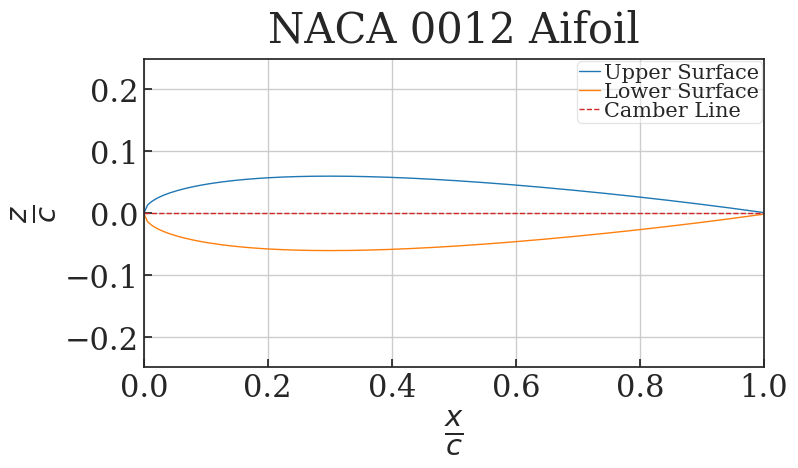

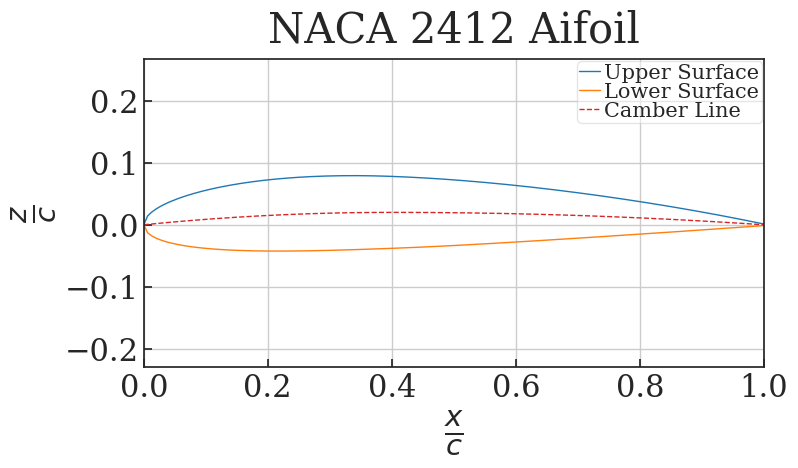

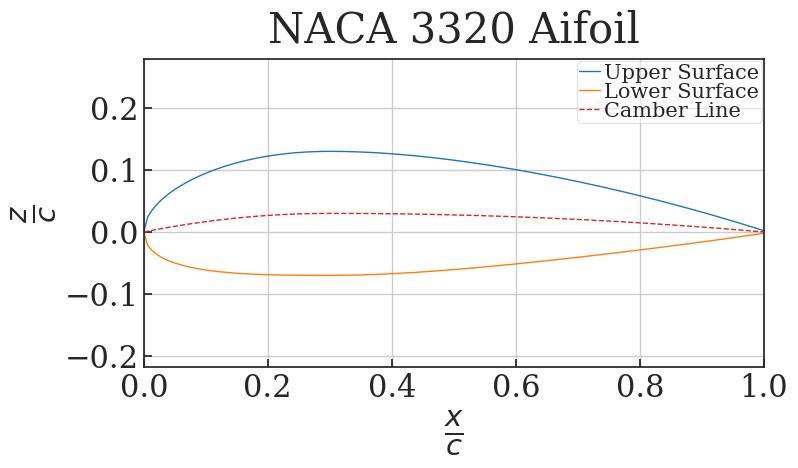

In [142]:
#create 4 digit NACA airfoil coordinate function and plot the airfoil

stepsize = 0.00625

def naca4(m_in,p_in,t_in): #creates the x and z arrays of the airfoil and plots them given 4 digit naca number
    m = m_in/100
    p = p_in/10
    t = t_in/100
    x = np.arange(0,1+stepsize,stepsize)
    upper = np.empty(0)
    lower = np.empty(0)
    camber = np.empty(0)

    if (m == 0) and (p == 0):
        camber = np.zeros(len(x))
    else:
        for i in x:
            if (i<p):
                camber = np.append(camber,((m/(p**2)) * (2*p*i - i**2)))
            else:
                camber = np.append(camber,((m/((1-p)**2)) * ((1 - (2*p)) + 2*p*i - i**2)))
    i = 0
    for j in x:
        upper = np.append(upper,camber[i] + (t/0.2)*(0.2969*(j)**(1/2) - 0.1260*j - 0.3516*j**2 + 0.2843*j**3 - 0.1015*j**4))
        lower = np.append(lower,camber[i] - (t/0.2)*(0.2969*(j)**(1/2) - 0.1260*j - 0.3516*j**2 + 0.2843*j**3 - 0.1015*j**4))
        i += 1

    return upper,lower,camber

def plotAirfoil(upper,lower,camber,nacaNum):
    x = np.arange(0,1+stepsize,stepsize)
    plt.figure(figsize=(8,4))
    plt.title("NACA {} Aifoil".format(nacaNum))
    plt.ylabel(r'$\frac{z}{c}$')
    plt.xlabel(r'$\frac{x}{c}$')

    plt.rc('legend',fontsize=15)

    plt.plot(x,upper,color = colors[0], label = 'Upper Surface', linestyle = '-',linewidth = 1, markersize = 8)
    plt.plot(x,lower,color = colors[1], label = 'Lower Surface', linestyle = '-', linewidth = 1, markersize = 8)
    plt.plot(x,camber,color = colors[3], label = 'Camber Line', linestyle = '--', linewidth = 1, markersize = 8)

    plt.grid(True) #Plot a grid
    #Force Axis to have equal scale (VERY important for geometry plots)
    plt.axis('equal') #************************************************************
    plt.xlim([0, 1]) #Lock x-axis to airfoil
    #Plot Legend located in 'best' space
    plt.legend(loc='best')

upper, lower, camber = naca4(0,0,12) #NACA 0012
plotAirfoil(upper,lower,camber,"0012") #NACA 0012
upper, lower, camber = naca4(2,4,12) #NACA 2412
plotAirfoil(upper,lower,camber,"2412") #NACA 2412
upper,lower,camber = naca4(3,3,20) #NACA 3320
plotAirfoil(upper,lower,camber,"3320") #NACA 3320



<hr>

***1.3: Designing NACA 5 Digit Airfoils***

The process for defining NACA 5 digit airfoils is similar to the process for 4 digit airfoils, except there is a small amount of added complexity and the formula for the camber line is slightly different. The thickness distribution, however, is the same, and has been copied from above.

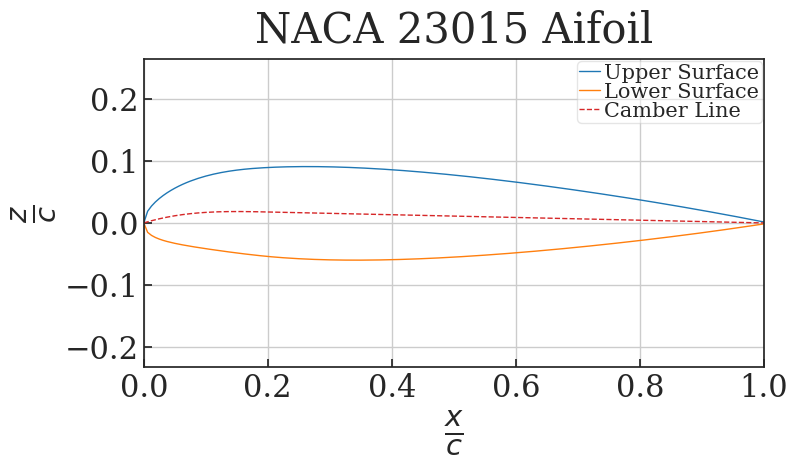

In [143]:
#Create 5 digit NACA function and plot

def naca5(L,P,S,TT):
    x = np.arange(0,1+stepsize,stepsize)

    k1 = [361.400, 51.640, 15.957, 6.643, 3.230] #tabulated values for k1
    r = [0.0580, 0.1260, 0.2025, 0.2900, 0.3910] #tabulated values for 1

    upper = np.empty(0)
    lower = np.empty(0)
    camber = np.empty(0)

    for i in x:
        if i < r[P-1]:
            camber = np.append(camber,(k1[P-1]/6)*(i**3 - 3*r[P-1]*i**2 + r[P-1]**2*(3-r[P-1])*i))
        else:
            camber = np.append(camber,((k1[P-1]*r[P-1]**3)/6)*(1-i))

    camber *= L/2

    i = 0
    for j in x:
        upper = np.append(upper,camber[i] + (TT/0.2/100)*(0.2969*(j)**(1/2) - 0.1260*j - 0.3516*j**2 + 0.2843*j**3 - 0.1015*j**4))
        lower = np.append(lower,camber[i] - (TT/0.2/100)*(0.2969*(j)**(1/2) - 0.1260*j - 0.3516*j**2 + 0.2843*j**3 - 0.1015*j**4))
        i += 1

    return upper, lower, camber

upper, lower, camber = naca5(2,3,0,15) 
plotAirfoil(upper,lower,camber,23015)

<hr>

## Problem 2

This problem is centered around using XFOIL, which can simulate air flow over airfoils. The problem asks for three airfoils, one of which is determined by me. The three airfoils used are NACA 0012, NACA 23012, and NACA 2415. Each of these airfoils is to be evaluated at three angles of attack: $\alpha = 0\degree$, $\alpha = 4\degree$, and $\alpha = 12\degree$, and at viscous and inviscid conditions. Thus, each airfoil will have nine cases, for a total of 27 cases that need to be evaluated. 

In [130]:
#Tabulated data from xfoil:

#Calculate Reynolds numbers for the two viscous flow cases (cases 1 and 2)
rho1 = 14.96e-4 #slug/ft^3
u1 = 100 #ft/s
mu1 = 3.430e-7 #lb*s/ft^3

rho2 = 10.65e-4
u2 = 450
mu2 = 3.217e-7

#characteristic length = 1 (?)
Re1 = rho1*u1/mu1
Re2 = rho2*u2/mu2

print("Reynolds Number for Flight Case 1: {:.3E}".format(round(Re1,2)))
print("Reynolds Number for Flight Case 2: {:.3E}".format(round(Re2,2)))

#coefficients of lift, drag, and moment, angles of attack (from 0 to 12), and the 2 viscid + 1 inviscid case

      #C:     L       M       D         L       M       D        L      M       D
n0012 = [[[0.0000,0.00000,-0.00106],[0.0000,0.00000,0.00645],[0.0000,0.0000,0.00523]], #alpha = 0
         [[0.4829,-0.0056,-0.00109],[0.4964,-0.0072,0.00942],[0.4313,0.0045,0.00673]], #alpha = 4
         [[1.4392,-0.0163,-0.00125],[01.1602,0.0241,0.02796],[1.2702,0.0099,0.01697]]] #alpha = 12
#flight case:      case0                     case1                    case2
#                (inviscid)              (condition 1)            (condition 2)
                
n23012= [[[0.1377,-0.0116,-0.00108],[0.1142,-0.0057,0.00704],[0.1252,-0.0096,0.00611]],
         [[0.6204,-0.0175,-0.00107],[0.6430,-0.0230,0.01059],[0.5696,-0.0063,0.00720]],
         [[1.5745,-0.0311,-0.00120],[1.3691,0.00210,0.01943],[1.4205,-0.0059,0.01436]]]

n2415 = [[[0.2614,-0.0563,-0.00139],[0.2295,-0.0497,0.00776],[0.2387,-0.0515,0.00627]],
         [[0.7549,-0.0642,-.000141],[0.7579,-0.0640,0.00972],[0.6721,-0.0470,0.00657]],
         [[1.7284,-0.0801,-0.00155],[1.3143,-0.0127,0.02426],[1.4178,-0.0257,0.01711]]]

n23012 = np.array(n23012)
n0012 = np.array(n0012)
n2415 = np.array(n2415)

#adds reynolds numbers to everything
def addRe (data):
      phList = np.zeros((3,3,4))
      for angle in range(3):
            for case in range(3):
                  if case == 0:
                        phList[angle][case] = np.append(data[angle][case],0)
                  if case == 1:
                        phList[angle][case] = np.append(data[angle][case],round(Re1,4))
                  if case == 2:
                        phList[angle][case] = np.append(data[angle][case],round(Re2,4))
      return phList

n0012 = addRe(n0012)
n23012 = addRe(n23012)
n2415 = addRe(n2415)

n0012data = np.concatenate((n0012[0],n0012[1],n0012[2]),axis =0)
n2415data = np.concatenate((n2415[0],n2415[1],n2415[2]),axis =0)
n23012data = np.concatenate((n23012[0],n23012[1],n23012[2]),axis =0)

#Tablulated Data:

n0012df = pd.DataFrame(n0012data, columns = ["Cl","Cm","Cd","Reynolds #"])
n23012df = pd.DataFrame(n23012data, columns = ["Cl","Cm","Cd","Reynolds #"])
n2415df = pd.DataFrame(n2415data, columns = ["Cl","Cm","Cd","Reynolds #"])

#Writes the list for the rows of the tables
def makeList(dataName):
      indexList = []
      for i in range(3):
            angle = 0
            if i == 0:
                  angle = 0
            if i == 1:
                  angle = 4
            if i == 2:
                  angle = 12
            for j in range(3):
                  indexList.append("{}, AOA = {} degrees:".format(dataName,angle))
      return indexList

n23012df.index = makeList("NACA 23012")
n0012df.index = makeList("NACA 0012")
n2415df.index = makeList("NACA 2415")

print("")
print(n0012df)
print("")
print(n2415df)
print("")
print(n23012df)



Reynolds Number for Flight Case 1: 4.362E+05
Reynolds Number for Flight Case 2: 1.490E+06

                                  Cl      Cm       Cd    Reynolds #
NACA 0012, AOA = 0 degrees:   0.0000  0.0000 -0.00106  0.000000e+00
NACA 0012, AOA = 0 degrees:   0.0000  0.0000  0.00645  4.361516e+05
NACA 0012, AOA = 0 degrees:   0.0000  0.0000  0.00523  1.489742e+06
NACA 0012, AOA = 4 degrees:   0.4829 -0.0056 -0.00109  0.000000e+00
NACA 0012, AOA = 4 degrees:   0.4964 -0.0072  0.00942  4.361516e+05
NACA 0012, AOA = 4 degrees:   0.4313  0.0045  0.00673  1.489742e+06
NACA 0012, AOA = 12 degrees:  1.4392 -0.0163 -0.00125  0.000000e+00
NACA 0012, AOA = 12 degrees:  1.1602  0.0241  0.02796  4.361516e+05
NACA 0012, AOA = 12 degrees:  1.2702  0.0099  0.01697  1.489742e+06

                                  Cl      Cm        Cd    Reynolds #
NACA 2415, AOA = 0 degrees:   0.2614 -0.0563 -0.001390  0.000000e+00
NACA 2415, AOA = 0 degrees:   0.2295 -0.0497  0.007760  4.361516e+05
NACA 2415, AOA = 0 de

<Figure size 800x500 with 0 Axes>

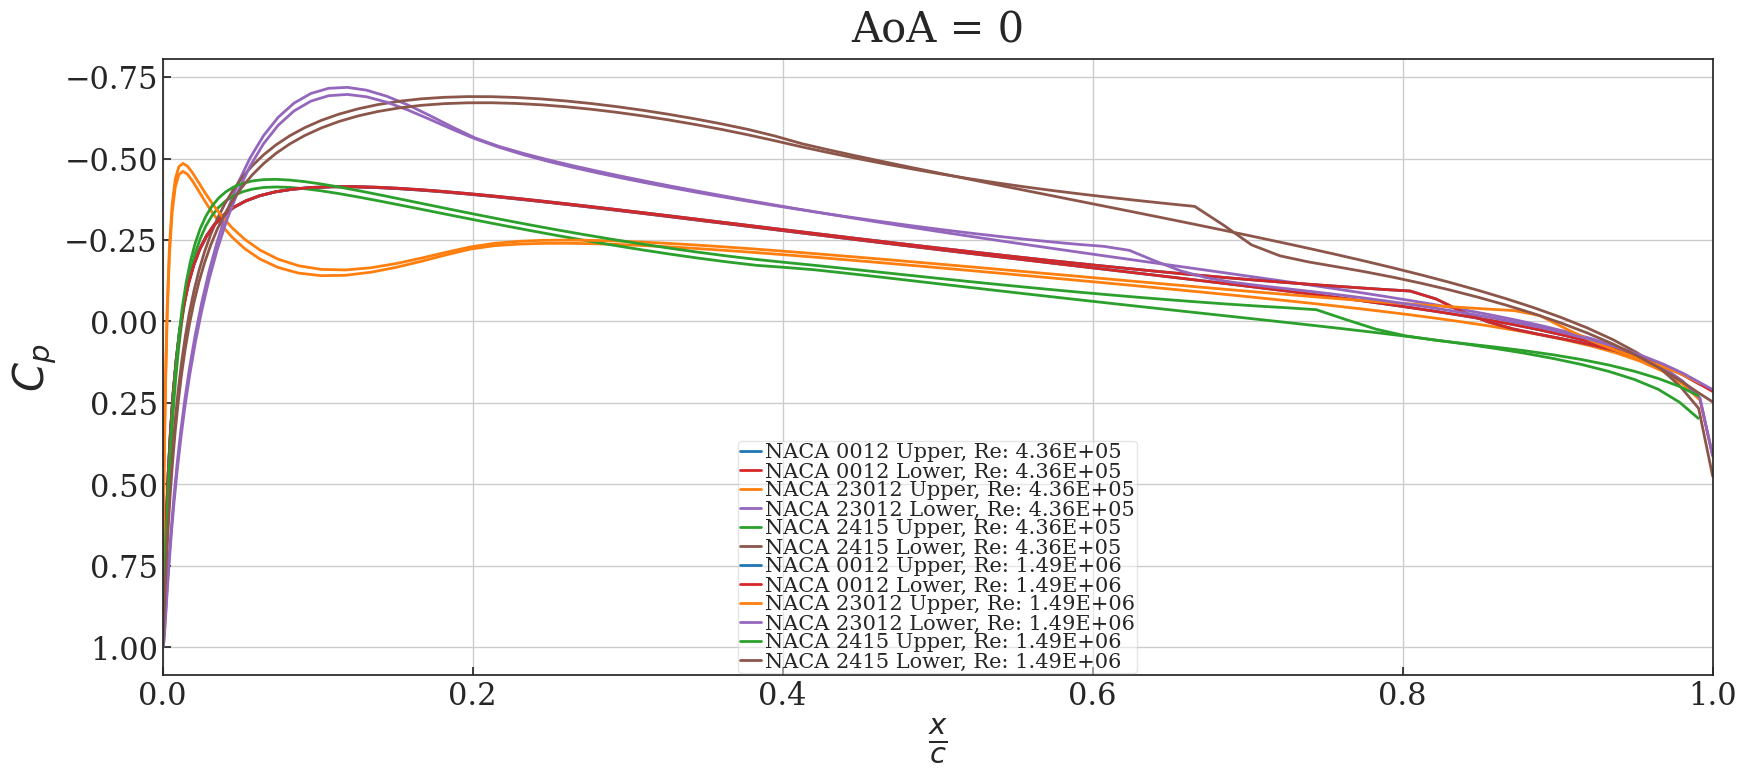

<Figure size 800x500 with 0 Axes>

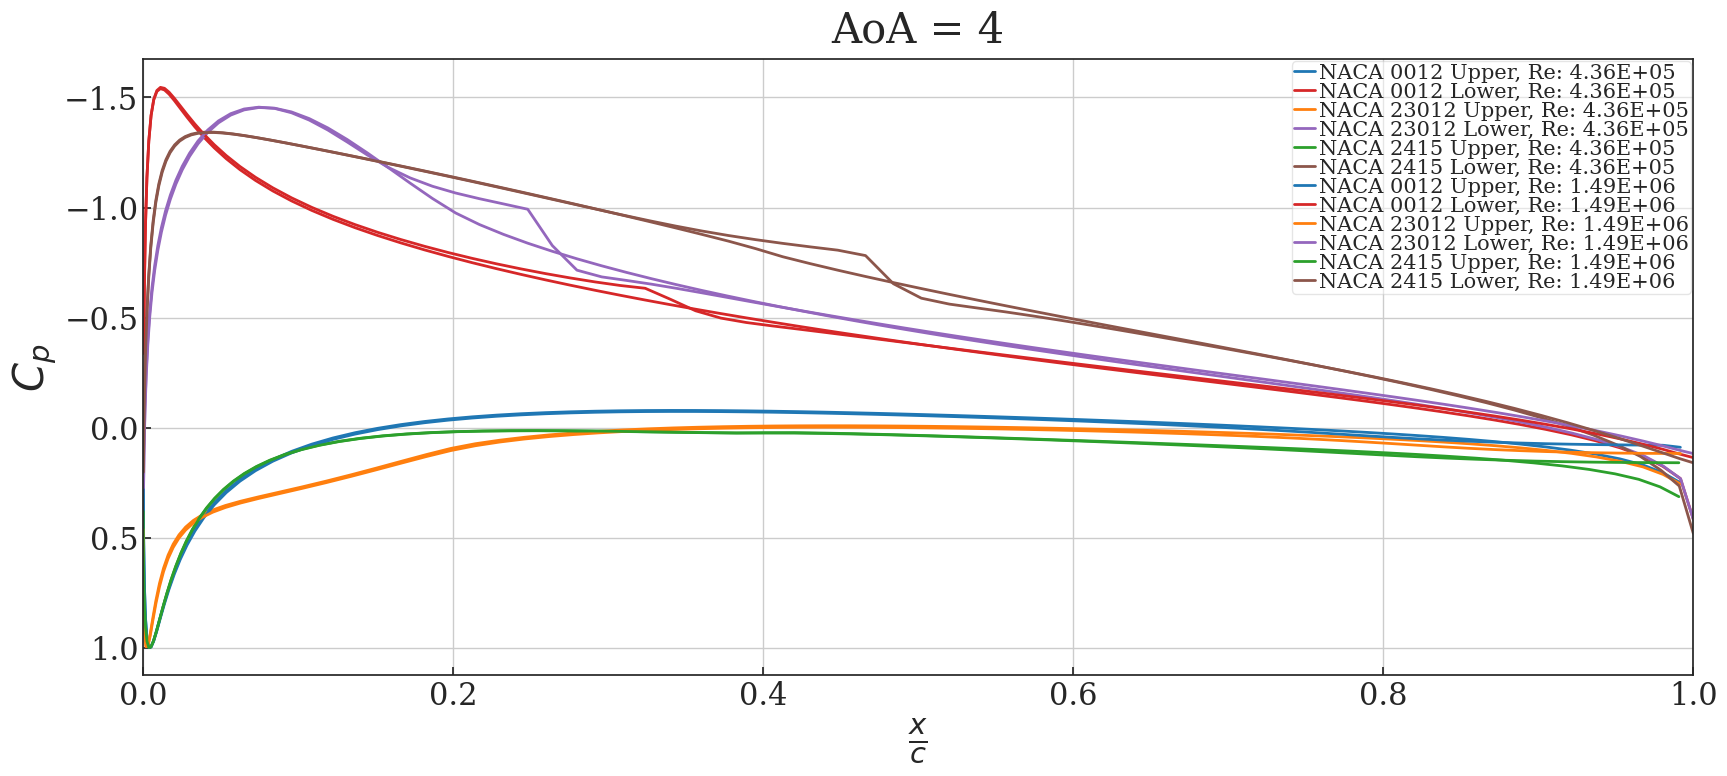

<Figure size 800x500 with 0 Axes>

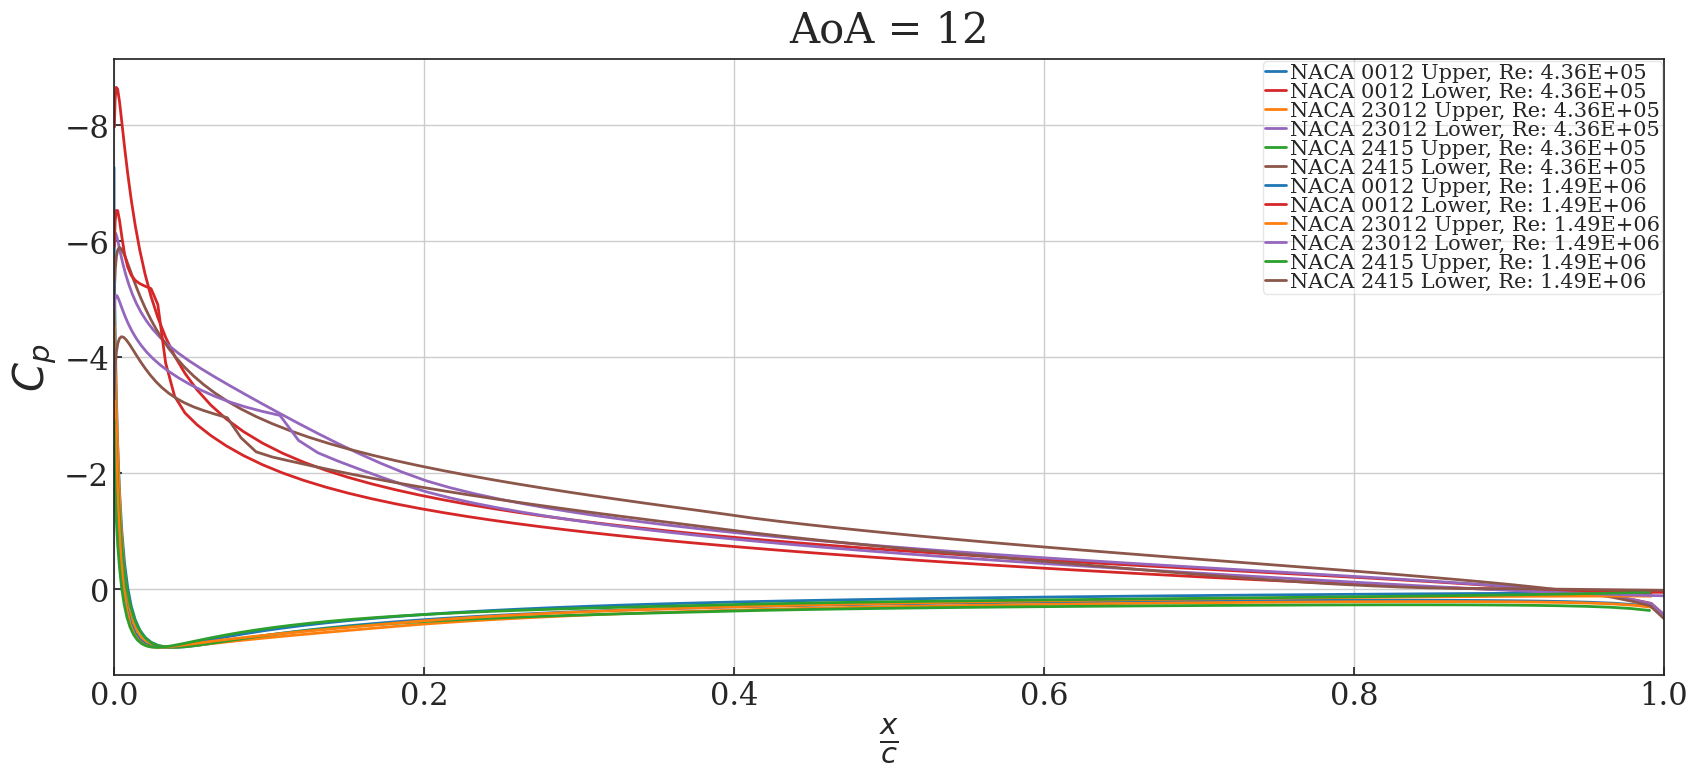

In [180]:
#Create plots for each angle of attack

import os.path #allows filepaths to be added on both mac and windows
folder = "xfoilCps"

def plotCp(angle):

    plt.figure().set_figheight(5)
    plt.figure().set_figwidth(20)
    plt.gca().invert_yaxis()

    plt.title("AoA = {}".format(angle))
    plt.ylabel(r'$C_p$')
    plt.xlabel(r'$\frac{x}{c}$')
    plt.rc('legend',fontsize=15) #change legend size to accomodate large titles

    for case in range(2): 
        Re = 0
        if case == 0:
            Re = Re1
        if case == 1:
            Re = Re2

        for i in range(3): 
            airfoil = '0'
            uLineColor = 0
            lLineColor = 0
            if i == 0:
                airfoil = '0012'
                uLineColor = colors[0]
                lLineColor = colors[3]
            if i == 1:
                airfoil = '23012'
                uLineColor = colors[1]
                lLineColor = colors[4]
            if i == 2:
                airfoil = '2415'
                uLineColor = colors[2]
                lLineColor = colors[5]
            filename = os.path.join(folder,"a{}naca{}CpC{}".format(angle,airfoil,case))
            xRaw,CpRaw = np.loadtxt(filename, skiprows = 1, unpack = True)

            upperX = np.empty(0)
            upperCp = np.empty(0)
            lowerX = np.empty(0)
            lowerCp = np.empty(0)
            for i in range(1,len(xRaw)):
                if xRaw[i-1] - xRaw[i] > 0:
                    lowerX = np.append(lowerX,xRaw[i-1])
                    lowerCp = np.append(lowerCp,CpRaw[i-1])
                else:
                    upperX = np.append(upperX,xRaw[i-1])
                    upperCp = np.append(upperCp,CpRaw[i-1])
            plt.plot(upperX,upperCp,label = "NACA {} Upper, Re: {:.2E}".format(airfoil,Re),color=uLineColor,linewidth = 2)
            plt.plot(lowerX,lowerCp,label = "NACA {} Lower, Re: {:.2E}".format(airfoil,Re),color=lLineColor,linewidth = 2)

    plt.xlim([0, 1]) #Lock x-axis to airfoil
    #Plot Legend located in 'best' space
    plt.legend(loc='best')


plotCp(0)
plotCp(4)
plotCp(12)
            
